<a href="https://colab.research.google.com/github/Adler-1014/SNU_ML_GROUP2/blob/JY/preProcess_jy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
df = pd.read_csv('/content/drive/MyDrive/MLDL/Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [128]:
df.shape

(8523, 12)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 전처리

In [130]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [131]:
categorical_data = df.select_dtypes(include=[object])
print("categorical features: ", categorical_data.shape[1])
numerical_data = df.select_dtypes(include=[np.float64, np.int64])
print("numerical features: ", numerical_data.shape[1])

categorical features:  7
numerical features:  5


In [132]:
categorical_data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


## 결측치 처리

In [133]:
#Outlet_Size의 결측치를 최빈값으로 대체
categorical_data['Outlet_Size'] = categorical_data['Outlet_Size'].fillna(categorical_data['Outlet_Size'].mode()[0])

In [134]:
categorical_data.isnull().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

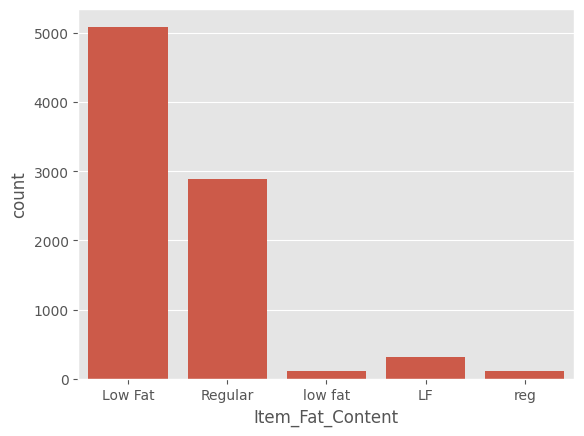

In [135]:
sns.countplot(x='Item_Fat_Content', data=categorical_data)

In [136]:
#범주명 일원화
categorical_data.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

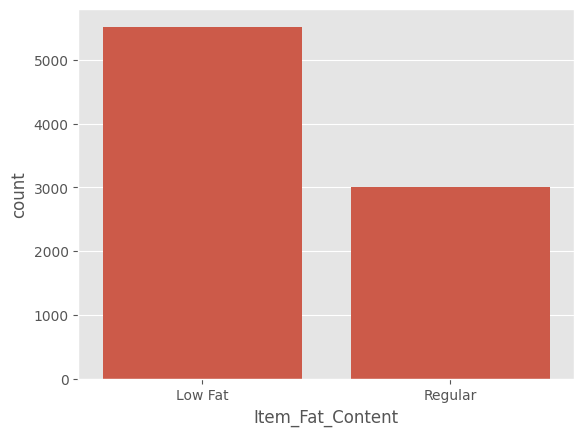

In [137]:
#countplot:범주별로 집계
sns.countplot(x='Item_Fat_Content', data=categorical_data)

In [141]:
numerical_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## 결측치 처리(2)

In [142]:
numerical_data.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [143]:
#KNN으로 결측치 채우기
from sklearn.impute import KNNImputer

In [144]:
#범주형 데이터 레이블 인코딩 변환
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
numerical_data['Item_Weight'] = label_encoder.fit_transform(numerical_data['Item_Weight'])

In [145]:
#KNNImputer 정의
imputer = KNNImputer(n_neighbors=2)
Data_Only_Item_Weight = numerical_data[['Item_Weight']]

Data_Only_Item_Weight['Item_Weight'] = imputer.fit_transform(Data_Only_Item_Weight)

In [146]:
print(Data_Only_Item_Weight)

      Item_Weight
0           284.0
1            57.0
2           375.0
3           392.0
4           265.0
...           ...
8518        125.0
8519        233.0
8520        299.0
8521        149.0
8522        346.0

[8523 rows x 1 columns]


In [147]:
Data_Only_Item_Weight.isnull().sum()

Item_Weight    0
dtype: int64

In [152]:
numerical_data = numerical_data.drop('Item_Weight', axis=1)

In [153]:
numerical_data = pd.concat([numerical_data, Data_Only_Item_Weight], axis=1)

In [154]:
final_data = pd.concat([categorical_data, numerical_data], axis=1)

In [155]:
final_data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
Item_Weight                  0
dtype: int64

In [156]:
final_data.to_csv('data_jy.csv', index=False)